!pip install GetOldTweets3

!pip install nltk

import nltk

nltk.download('punkt')

nltk.download('stopwords')

nltk.download('wordnet')

# Twitter Sentiment Analysis

### Abstract

The goal of this project was to predict sentiment for the given Twitter post using Python. Sentiment analysis can predict many different emotions attached to the text, we will predict sentiment according to our list of emotions with contain different emotions. We will use Corona Virus as our search key and will see the sentiments of the people after outbreak of corona virus.

### Used Python Libraries

In [121]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import GetOldTweets3 as got

Let's create a function to get tweets from twitter. To get tweets from twitter we will use a Library call GetOldTweets. The library provides us with a twitter manager where we can put our search query, date range, and tweet limit also. Then there is a function to get tweets. So we will integrate it.

#### Before Outbreak of Corona Virus

In [122]:
def get_tweets(keyword,fromDate,toDate,tweetCount):
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(keyword) \
        .setLang('english') \
        .setSince(fromDate) \
        .setUntil(toDate) \
        .setMaxTweets(tweetCount)
    
    #Creating of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    #Creating list of chosen tweet data
    tweets = [[tweet.text] for tweet in tweets]
    return tweets

Here we have created a function which will return us a tweets. Now, we will fetch all tweets by calling a function.

In [125]:
# fetching tweets by calling a function
before_outbreak_tweets = get_tweets("coronavirus","2020-02-01","2020-02-29",2000)

In [126]:
#Get the length of tweets that we fetched

length = len(before_outbreak_tweets)
print(length)

2000


Ok so now we have 2000 scrapped tweets from twitter on Corona Virus, now we will convert our list of tweets into plain text. 
To do so, we will loop all of our tweets with for lop

In [127]:
plain_text = ''
for i in range(0, length):
    plain_text = before_outbreak_tweets[i][0] + " " + plain_text

We have converted our list into plain text. Now, we will procced towards data cleaning.

First, we will convert our all text into lower case as it is the best practice to implement as working with text.

In [128]:
#Converting to lowercase

lower_case  = plain_text.lower()

Here we have converted our text in to lowercase. Now, we will remove all special symbols i.e. punctuation from our text.

In [129]:
#removing punctuation

cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))

Here we have removed all punctuation from our text

Now, we will use word tokenize to seperate our words from sentence

In [130]:
#Using word tokenize to convert sentence into words

from nltk.tokenize import word_tokenize

tokenized_words = word_tokenize(cleaned_text, "english")

Here we have converted our sentence into words. 
Now we will remove stopwords from our data

In [131]:
#removing stopwords from data

from nltk.corpus import stopwords

final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)


Now, we will use lemmatizer to transform our word from plural to single form 

In [132]:
# Using lemmatization to get words to its base form.
from nltk.stem import WordNetLemmatizer

lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

Here we have converted our words to singluar form or to a base word using lemmatizer

Now, we will import our emotion list and will check each of our word with emotion list. Will see is any of our words matches with the emotion list words, if our words will exist in list the we will fetch emotion attached to that letter.

In [133]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            


w = Counter(emotion_list)
print("Count of each emotion \n", w)

Count of each emotion 
 Counter({' happy': 12, ' sad': 9, ' fearful': 7, ' powerless': 6, ' attracted': 5, ' adequate': 4, ' fearless': 3, ' average': 3, ' surprise': 3, ' hated': 3, ' singled out': 3, ' attached': 3, ' safe': 2, ' free': 2, ' angry': 2, ' cheated': 1, ' demoralized': 1, ' entitled': 1, ' lost': 1, ' esteemed': 1, ' independent': 1, ' apathetic': 1, ' alone': 1, ' embarrassed': 1, ' focused': 1, ' loved': 1, ' anxious': 1})


As we have fetched our sentiments from emotion list with there count, now we will plot it in a graph to see the sentiment count.

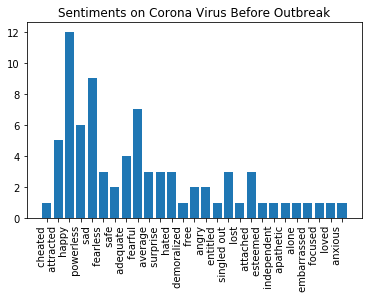

In [134]:
fig, ax1 = plt.subplots()
ax1.set_title('Sentiments on Corona Virus Before Outbreak')
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate(rotation=90)
plt.savefig('graph.png')
plt.show()

#### After Outbreak of Corona Virus

In [136]:
# fetching tweets by calling a function
after_outbreak_tweets = get_tweets("coronavirus","2020-04-01","2020-04-29",2000)

In [137]:
#Get the length of tweets that we fetched

length = len(after_outbreak_tweets)

plain_text = ''
for i in range(0, length):
    plain_text = after_outbreak_tweets[i][0] + " " + plain_text
    
#Converting to lowercase

lower_case  = plain_text.lower()

#removing punctuation

cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))

In [138]:
#Using word tokenize to convert sentence into words


tokenized_words = word_tokenize(cleaned_text, "english")

In [139]:
#removing stopwords from data
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)


In [140]:
lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [141]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            


af = Counter(emotion_list)
print("Count of each emotion \n", af)

Count of each emotion 
 Counter({' sad': 10, ' fearful': 9, ' attracted': 6, ' powerless': 6, ' happy': 6, ' fearless': 3, ' adequate': 3, ' hated': 3, ' free': 3, ' attached': 3, ' average': 2, ' entitled': 2, ' independent': 2, ' cheated': 1, ' safe': 1, ' angry': 1, ' alone': 1, ' ecstatic': 1, ' singled out': 1, ' bored': 1, ' lost': 1, ' codependent': 1, ' obsessed': 1, ' esteemed': 1, ' surprise': 1, ' embarrassed': 1, ' focused': 1, ' loved': 1})


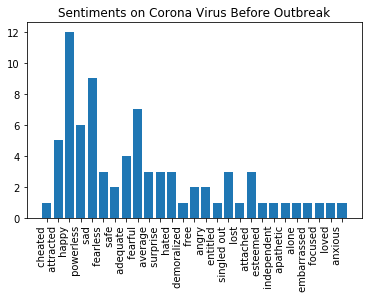

In [142]:
fig, ax1 = plt.subplots()
ax1.set_title('Sentiments on Corona Virus Before Outbreak')
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate(rotation=90)
plt.savefig('graph.png')
plt.show()

Here we can see the sentiments of tweets are happy and attracted on the month of Feb, i.e. before the outbreak of Corona Virus.

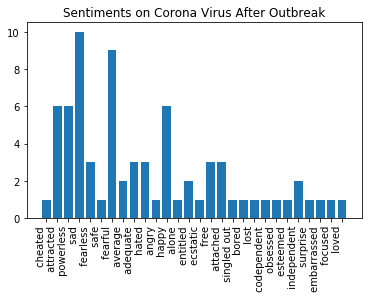

In [143]:
fig, ax1 = plt.subplots()
ax1.set_title('Sentiments on Corona Virus After Outbreak')
ax1.bar(af.keys(),af.values())
fig.autofmt_xdate(rotation=90)
plt.savefig('graph.png')
plt.show()

Here we can see people sentiments after corona virus outbreak, most of the  sentiments are related with sadness, powerless, fearful etc.

From the above two observation we can see how sentiments have changed from happy and attracted to sad and fearful.

In this project, we have seen sentiments of people by getting tweets, before and after major outbreak of corona virus. Here we have used GetOldTweets3 to fetch tweets from twitter. Also we have used tokenizer, stopwords and punctuation for our data preprocessing techniques. At the end we have used our emotion list to get sentiments from tweets.